# Applied ML
-  When it comes to automating simple tasks, Machine Learning is at the core of it all. By using machine learning algorithms we can easily scale up the data/workload that we were previously able to handle whilst doing it at record breaking speed.


- A simple example where ML can be incorporated is in uploading hand-written forms online or to a server to be processed. This can save organizations a lot of time and resources which can be directed to other aspects of the businesses.



## How does it work

- The machine learning technique that is used here is Convolutional Neural Networks (CNN) which is a supervised deep learning model. This is similar to regular neural nets and uses weights and biases. 


- Image data can be quite difficult to deal with due to the information that is contained within it. When it comes to most computer vision problems  classical neural nets will not necessarly do a good job on mapping out or identifying the detail in the image. As a result, classical neural nets will not be able to scale when dealing with high def images as they will not pick up the detail (objects) very well.


- For this we need CNN models. The architecture of CNN models are better suited to deal with image data. 


- The key features in a CNN model are the convolutional and maxpoling layer. The convolution layer convolves around the image using a filter window. The  window filter is normally a 3x3 matrix with values that are optimised to e.g find edges in an image. As the filter convolves around the image it will do so whilst detecting the borders/edges in the image. Once it has finished convoluting we can expect the model to have mapped out the general shapes in the image. In a CNN model you can have numerous filters, all detecting different aspects of the image e.g  be vertical lines, horizontal lines, curves, circles, squares ....


- The maxpooling layer helps intensify the prominent features in the image. The method works similarly to the convolution layer as a filter window (normally 2x2) convolves around the image whilst saving the prominent features (the highest values in the filter window) in the image into a new image array. The new image array is a simplification of the original image array hence will have less information, but will still contain prominent features. This helps the model to map and focus on the areas of high interest(where object may be present) and makes it easier to focus on the detail.


- It is important to note that each layer is connected hence each neuron is linked to one another in order to determine the true relations of each parameter on the labels. The convolution and maxpooling layer help simplify and breakdown the data that gets passed and at the end helps us classify our image.



## Tensorflow

- Tensorflow is one of the widely used machine learning libraries. 
- Tensorflow is created by Google and is mainly used to carryout complex numerical computation for machine learning models.

## MNIST
- For this project we will use the MNIST dataset. This is a database that contains over 70,000 images of handrawn numbers 0-9 from the US Census Bureau.


- The dataset has been separated already for us: -  60,000 for training and 10,000 for testing

                                          

- You can access the dataset directly through Tensorflow.keras library



## Goal
- This is an application where users will be able to use the html5 canvas to draw a number. 

- The user will interact with the machine learning algorithm which will predict and recognize the drawn number written by the user. 

- The application will use tensorflow at the backend to predict the numbers drawn by the user.

In [117]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image

import os as os



- Access the mnist dataset through tf.keras

In [118]:
#Get the Mnist module
mnist_df = tf.keras.datasets.mnist

#Check how the type of the data
t=mnist_df.load_data()

print('Datatype: '+str(type(t)))
print('Length of dataset: '+str(len(t)))

Datatype: <class 'tuple'>
Length of dataset: 2


- It is important to realise how the data has been loaded before working on it. As you can see all the Mnist numbers are in a tuple; It is always good practice to check



- As mentioned earlier the dataset has already been separated for us into training and testing respectively, hence the dataset length is only 2. 



- All we have to do now is define our y_train and x_train variables for the Training dataset; and also define our y_test and x_test variables for our testing dataset. 


- The variables will be in array format

In [119]:
#Split the data into the variables we need
(x_train, y_train), (x_test, y_test) = mnist_df.load_data()



- Let's check to see the first number in the  X training dataset

In [120]:
sample_digit = x_train[0] 
print('Shape of the array: '+str(sample_digit.shape))
sample_digit

Shape of the array: (28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

- Now let's plot the array!

- pyplot.imshow() allows us to plot any array visually into a grayscale image.

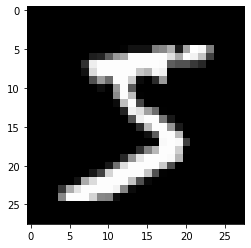

In [121]:
#Since the digit is flattened into 1D array (784), reshape it to be a 2D array (28 x28 specifically)
sample_digit.reshape(28, 28)
#plot
plt.imshow(sample_digit, cmap='gray')
plt.show()

- As we can see the first value from the x_train dataset is 5. Consequently, the first value for the y_train value should be 5 also. Let's check to make sure.

In [122]:
sample_digit_ylabel = y_train[0] 
sample_digit_ylabel

5

- Both the x_train and y_train values correspond which is a good thing. Let's take a random value from the dataset and see if that check passes.

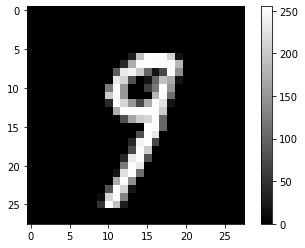

The y label digit is 9


In [123]:
#x label digit
random_digit_x= x_train[43] 
random_digit_x.reshape(28, 28)
#plot
plt.imshow(random_digit_x, cmap='gray')
plt.colorbar()
plt.show()

#y label digit
random_digit_y= y_train[43] 
print('The y label digit is '+str(random_digit_y))

# Modeling

- The main goal of the modelling  stage is to train the model in such a way that it spots the digit characteristics  of all the arrays in the x_train to the corresponding y_train (the y label). 

- The model we are going to use can get up to 99% accuracy at classifying  digits. This is mainly influenced by the amount of epochs we train the model; the more epochs we cycle the data through the more accurate  the model tends to get.


- The architecture for this model is quite small and simple as it has been optimised for this specific classification problem; you can find similar  model architectures from the keras mnist_cnn documentation.



- The model is a sequential model and is modelling the images in 3 dimension(28x28x1). This is to allow the model to have a better spacial understanding.

- The model comprises of 2 CNN layer. The first layer tends to detect mainly the edges of the images and nothing else but as we add more layers the model will be better able to detect the individual charateristic features of the numbers passed.


- The other layers allow the model to dig deeper into the features to help bring focus to the right feature characteristics .



- Max pooling layer allows us to summarise or reduce the information of the image passed; in this example we reduced it by a factor of 2.
- The Flattening layer changes the dimensionality of the image to being 1D array
- The Dense layer brings the outcome into focus.
- The Dropout layer helps us avoid overfitment during training; it does this by dropping  random features.
- Lastly the readout layer allows us to reduce the features and dimensions of the digits into 10 different classes(0-9).

- The last layer is sometimes called the probability matrix; it carries out a probability distribution  across all the different classes in order to identify the digit class that the number passed belongs to. Usually the number will be assigned to the class with the highest probability even if there is some probabilities present in other classes. This is done using the softmax activation function.

###### Summary
- This model architecture takes in a digit with the dimension (28x28x1) in array format and will classify digit in 10 classes (numbers from 0-9).
- As you may have noticed the model architecture is designed in such a way to reduce dimensionality and feature information at each layer going all the way down to the 10 classes.



In [124]:
#Model Architecture
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])
    
    return model
 

In [125]:
#Model
model = create_model()

#summary of model architecture
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)             

In [126]:
#Standardizing the image so model can learn better

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#deviding the numpy array values by 255 in order to normalize the data
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [127]:
#Default dimensions of the digit array (2D)
w, h = 28, 28

#Reshape the dimensions of the X_Train, X_Test dataset (3D) as the model takes in 3D array
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

#make a model checkpoint
checkpoint_path = "training_9/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Save the trained model variable weights onto the checkpoint created
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


#Train the model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=12, callbacks = [cp_callback])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
59968/60000 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9402
Epoch 00001: saving model to training_9/cp.ckpt
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.1955 - accuracy: 0.9402 - val_loss: 0.0437 - val_accuracy: 0.9853
Epoch 2/12
59968/60000 [============================>.] - ETA: 0s - loss: 0.0830 - accuracy: 0.9755
Epoch 00002: saving model to training_9/cp.ckpt
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.0831 - accuracy: 0.9755 - val_loss: 0.0389 - val_accuracy: 0.9861
Epoch 3/12
59968/60000 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9810
Epoch 00003: saving model to training_9/cp.ckpt
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0365 - val_accuracy: 0.9882
Epoch 4/12
59968/60000 [============================>.] - ETA: 0s - loss: 0.0514 - accura

In [128]:
#Check the model accuracy using the data that has not been seen by the model #~98.88
history.model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.030749074101927697, 0.993]

In [129]:
model_loss=history.history['loss']
model_val_loss=history.history['val_loss']

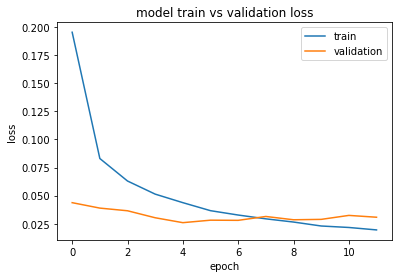

In [130]:
#Check for over or under fitting 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


- As you can see the model has been trained for 12 epochs and has managed to get 99% accuracy on the test data. We can always increase the epochs to get a more accurate model, however do make sure that the validation data is not increasing as that can lead to overfitting. You can always plot the validation loss and the training data loss to see any divergences.




- We have also saved the trained model onto the specified path using the os library. All the trained model weights will be saved as a checkpoint for it to be used later on when predicting hand-drawn numbers without the need to retrain them model.

### Using the saved trained model

- We load the trained model weights from our checkpoint and will be able to re-evaluate the test dataset without training the data.

In [108]:
checkpoint_path="training_8/cp.ckpt"
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {}%".format(100*acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Restored model, accuracy: 99.26000237464905%


#### New image

- Create a picture of a number using paint or paintbrush. Save it as a png file and place it the same directory where your notebook and lets pass it to the model to see if it will get right!

In [114]:

#Point to the image file and resize as neccessary
img = image.load_img(path="four4.png",grayscale=True,target_size=(28,28,1))
img

- Turn the image to a numpy array so that it can be passed to the model.

In [115]:

img = image.img_to_array(img)
img/=255
#reshape the image so that it is model ready
img = np.reshape(img, (1, img.shape[0], img.shape[1], 1))
img.shape

(1, 28, 28, 1)

- Pass the image to the trained model to predict the number

In [116]:
model = create_model()
checkpoint_path1 = "training_8/cp.ckpt"

img= tf.cast(img, tf.float32)

model.load_weights(checkpoint_path1)
prediction =model.predict_classes (img, batch_size=1)
print(prediction)

[5]
